<a href="https://colab.research.google.com/github/16Komang/PCVK/blob/main/ProjectUTS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Menghubungkan google colab dan google drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Mengimport modul dari phyton
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import math
from google.colab.patches import cv2_imshow
from PIL import Image as im

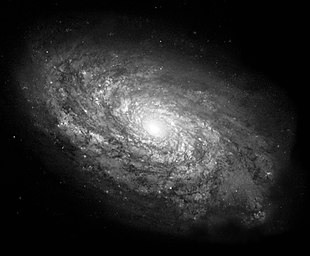

In [3]:
# Memasukan gambar yang akan di filtering dari google drive
img = cv.imread('/content/drive/MyDrive/Images/galaxy.jpg')
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
cv2_imshow(img_gray)

In [4]:
def filtering(image, kernel, stride, padding):
  image = np.pad(image, padding, mode='constant', constant_values=0)

  kernel_height, kernel_width = kernel.shape
  padded_height, padded_width = image.shape

  output_height = (padded_height - kernel_height) // stride + 1
  output_width = (padded_width - kernel_width) // stride + 1

  new_image = np.zeros((output_height, output_width)).astype(np.float32)

  # convolution process
  for y in range(0, output_height):
    for x in range(0, output_width):
      new_image[y][x] = np.sum(image[y * stride:y * stride + kernel_height, x * stride:x * stride + kernel_width] * kernel).astype(np.float32)
  return new_image

## Filtering Mean

Original


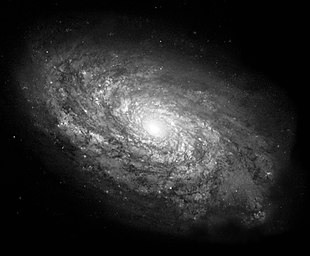

Mean


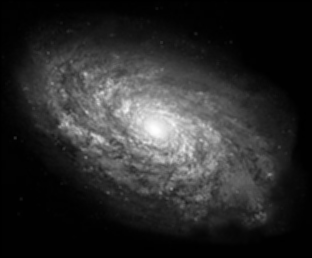

In [8]:
# Kodingan mean
kernal_mean = np.array([[1/9,1/9,1/9],
                       [1/9,1/9,1/9],
                       [1/9,1/9,1/9]])
# Hasil
print('Original')
cv2_imshow(img_gray)
print('Mean')
cv2_imshow(filtering(img_gray,kernal_mean,1,2))

## Filtering Median

Original


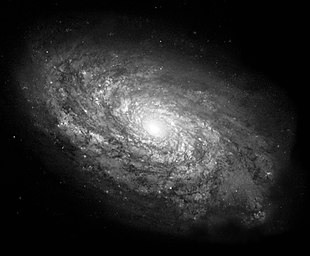

Median


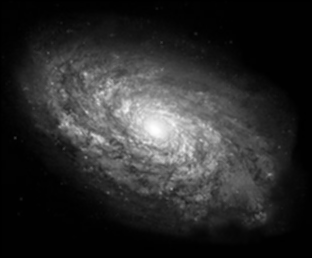

In [11]:
# Kodingan median
kernal_median = np.array([[1/10,1/10,1/10],
                       [1/10,1/5,1/10],
                       [1/10,1/10,1/10]])
# Hasil
print('Original')
cv2_imshow(img_gray)
print('Median')
cv2_imshow(filtering(img_gray,kernal_median,1,2))

## Filtering Modus

Original


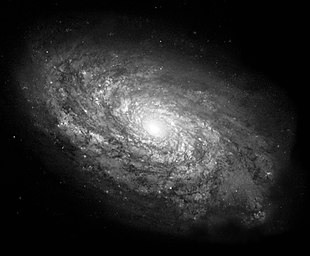

Modus


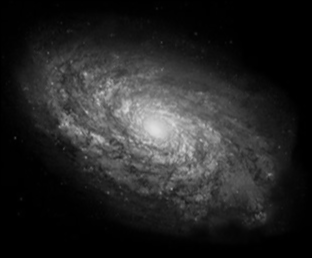

In [12]:
# Kodingan modus
kernal_modus = np.array([[1/16,1/8,1/16],
                       [1/16,1/4,1/16],
                       [1/16,1/8,1/16]])
# Hasil
print('Original')
cv2_imshow(img_gray)
print('Modus')
cv2_imshow(filtering(img_gray,kernal_modus,1,2))